In [18]:
#Imports
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


import pandas as pd
import numpy as np

import random

from ast import literal_eval
from src.custom_funcs import run_em, tolerance_sort, ternary_plot, CB_color_cycle, max_posterior_label, get_boundaries, base_plot
from src.bootstrap import bootstrap

In [2]:
random.seed(12)
df_snli = pd.read_csv('../data/final/snli-clean.csv', index_col=0)
df_snli.old_labels = df_snli.old_labels.apply(literal_eval) # since quotes in list elements are escaped

In [3]:
#extract relevant columns
snli_one_hot = df_snli[['e', 'n', 'c']]
snli_one_hot_arr = np.array(snli_one_hot).astype(int)

# 1. EM on full dataset, N=1514, J=100

In [4]:
random.seed(12)
snli_em = run_em(snli_one_hot_arr, K=3)

In [5]:
theta,matched_index = tolerance_sort(snli_em[2], 0.05, reverse=True)

pi = snli_em[1][matched_index]
tau = snli_em[3][:, matched_index]
bounds_original = get_boundaries(pi, theta)

In [6]:
bootstrap_full = bootstrap(snli_one_hot_arr)

Bootstrap iteration:  0
Bootstrap iteration:  10
Bootstrap iteration:  20
Bootstrap iteration:  30
Bootstrap iteration:  40


In [7]:
snli_one_hot_arr.shape[0]

1514

In [13]:
pi_mean = np.mean(bootstrap_full[('pi')], axis=0)
theta_mean = np.mean(bootstrap_full[('theta')], axis=0)
bounds_mean = get_boundaries(pi_mean, theta_mean)

In [47]:
def draw_bootstrapped_lines(bounds_list, bounds_mean, alpha=0.7):
    
    # contradiction vs entailment
    coordinates_ce = [x[0] for x in bounds_list]
    max_index_ce = np.argmax(coordinates_ce,axis=0)
    pt_ce_1 = coordinates_ce[max_index_ce[0]]
    pt_ce_2 = coordinates_ce[max_index_ce[2]]

    # contradiction vs neutral
    coordinates_cn = [x[1] for x in bounds_list]
    max_index_cn = np.argmax(coordinates_cn,axis=0)
    pt_cn_1 = coordinates_cn[max_index_cn[0]]
    pt_cn_2 = coordinates_cn[max_index_cn[1]]

    # neutral vs entailment
    coordinates_ne = [x[2] for x in bounds_list]
    max_index_ne = np.argmax(coordinates_ne,axis=0)
    pt_ne_1 = coordinates_ne[max_index_ne[1]]
    pt_ne_2 = coordinates_ne[max_index_ne[2]]


    for b in range(len(bounds_list)):

        bnd = bounds_list[b]
        if len(bnd) == 4:
            tax.line(bnd[0], bnd[3], color="gray", linewidth=0.7, alpha = alpha)
            tax.line(bnd[1], bnd[3], color="gray", linewidth=0.7, alpha = alpha)
            tax.line(bnd[2], bnd[3], color="gray", linewidth=0.7, alpha = alpha)

        else:
            tax.line(bnd[2], bnd[3], color="gray", linewidth=0.7, alpha = alpha)
            tax.line(bnd[1], bnd[4], color="gray", linewidth=0.7, alpha = alpha)


    tax.line(bounds_original[0], bounds_original[3], color=CB_color_cycle[7])
    tax.line(bounds_original[1], bounds_original[3], color=CB_color_cycle[7])
    tax.line(bounds_original[2], bounds_original[3], color=CB_color_cycle[7])

    tax.line(bounds_mean[0], bounds_mean[3], color="mediumblue")
    tax.line(bounds_mean[1], bounds_mean[3], color="mediumblue")
    tax.line(bounds_mean[2], bounds_mean[3], color="mediumblue")

    tax.line(pt_ce_1, pt_ce_2, color=CB_color_cycle[1], linewidth=3)
    tax.line(pt_cn_1, pt_cn_2, color=CB_color_cycle[1], linewidth=3)
    tax.line(pt_ne_1, pt_ne_2, color=CB_color_cycle[1], linewidth=3)

    tax._redraw_labels()

Full Data - Bootstrapped


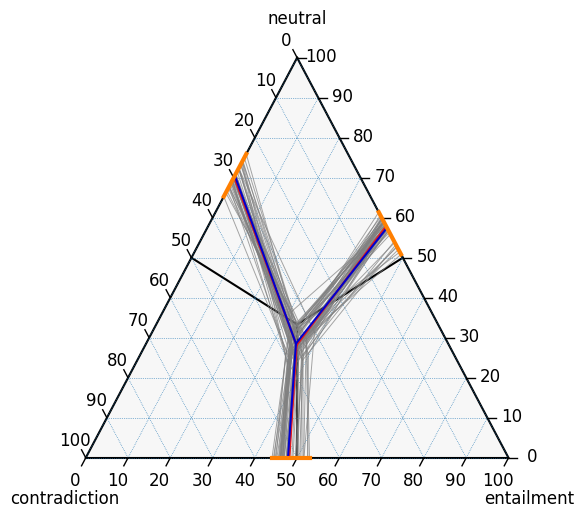

In [48]:
print('Full Data - Bootstrapped')
figure, tax = base_plot(scale=100, fontsize=12, size=6, multiple=10, tick_fontsize=12, tick_offset=0.02, label_offset=0)
draw_bootstrapped_lines(bootstrap_full['bounds'], bounds_mean)
figure.savefig("../figs/full_bootstrap.png", bbox_inches='tight', dpi=300)